In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV

In [2]:
file_path = r'C:\Users\PC\semester B project - final V33333333333333\train'
filenames = os.listdir(file_path)
classes = []
for filename in filenames:
    image_class = filename.split(".")[0]
    if image_class == "dog":
        classes.append(1)
    else:
        classes.append(0)

In [3]:
df = pd.DataFrame({"filename": filenames, "category": classes})
df["category"] = df["category"].replace({0: "cat", 1: "dog"})

In [4]:
df.head()

,filename,category
0,cat.0.jpg,cat
1,cat.1.jpg,cat
2,cat.10.jpg,cat
3,cat.100.jpg,cat
4,cat.1000.jpg,cat


In [5]:
df.tail()

,filename,category
24995,dog.9995.jpg,dog
24996,dog.9996.jpg,dog
24997,dog.9997.jpg,dog
24998,dog.9998.jpg,dog
24999,dog.9999.jpg,dog


In [6]:
df.category.value_counts()

dog    12500
cat    12500
Name: category, dtype: int64

In [7]:
####################################################################################################
os.path.join(f'{file_path}', filenames[0])
############################################################################################

'C:\\Users\\PC\\semester B project - final V33333333333333\\train\\cat.0.jpg'

In [8]:
file_path = r'C:\Users\PC\semester B project - final V33333333333333\train'
filenames = os.listdir(file_path)
new_df = pd.DataFrame()
for i in range(25000):
    img = cv2.imread(os.path.join(f'{file_path}', filenames[i]), 0)
    img_resized = cv2.resize(img, (28,28),interpolation = cv2.INTER_AREA)
    img_reshape = img_resized.reshape(28*28)
    one_row_of_df = pd.DataFrame(img_reshape)
    new_df = pd.concat([new_df,one_row_of_df],axis=1)

In [9]:
new_df

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,174,44,50,223,100,8,117,60,244,76,...,176,33,32,203,126,142,92,41,243,243
1,188,47,59,228,95,8,112,62,247,73,...,170,26,40,203,130,147,90,50,181,245
2,199,51,60,227,133,8,94,62,253,68,...,177,45,57,203,127,149,88,44,114,248
3,204,43,59,229,183,8,92,63,253,74,...,196,132,75,205,118,152,83,51,90,242
4,209,42,57,227,196,8,106,66,254,91,...,201,167,62,204,139,154,95,91,88,248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,31,52,72,243,99,23,159,72,119,188,...,71,175,104,133,78,163,68,145,98,254
780,11,55,81,229,95,22,163,73,116,190,...,84,181,102,173,68,163,82,135,99,254
781,4,57,128,213,80,20,145,73,108,188,...,92,190,96,165,55,165,88,136,106,254
782,3,61,144,211,85,18,158,71,103,180,...,100,192,82,172,43,167,84,138,112,254


In [10]:
final_df_all_gray = new_df.transpose()
final_df_all_gray
final_df_all_gray.reset_index(drop=True,inplace=True)
final_df_all_gray['category'] = df['category']
final_df_all_gray

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,category
0,174,188,199,204,209,215,184,161,135,102,...,28,9,17,40,31,11,4,3,3,cat
1,44,47,51,43,42,52,65,69,75,90,...,55,35,34,51,52,55,57,61,53,cat
2,50,59,60,59,57,54,52,52,50,52,...,116,131,72,75,72,81,128,144,165,cat
3,223,228,227,229,227,226,228,225,223,209,...,160,176,235,250,243,229,213,211,215,cat
4,100,95,133,183,196,238,213,180,153,141,...,99,106,100,96,99,95,80,85,84,cat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,142,147,149,152,154,158,159,160,163,164,...,157,169,153,159,163,163,165,167,168,dog
24996,92,90,88,83,95,88,97,98,105,108,...,53,13,20,33,68,82,88,84,83,dog
24997,41,50,44,51,91,111,72,75,101,122,...,153,154,166,160,145,135,136,138,138,dog
24998,243,181,114,90,88,86,94,87,103,98,...,137,135,125,115,98,99,106,112,120,dog


In [11]:
X = np.array(final_df_all_gray.drop(columns = ['category']))
y = np.array(final_df_all_gray['category'])

In [12]:
X.shape

(25000, 784)

In [13]:
y.shape

(25000,)

In [14]:
X = StandardScaler().fit_transform(X)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)

'784'

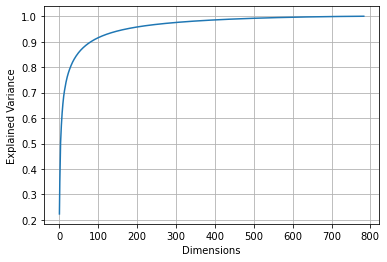

In [16]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.xlabel('Dimensions')
plt.ylabel('Explained Variance')
plt.grid(True)
plt.plot(cumsum)
str(pca.n_components_)

- I chose n_components=0.95

In [17]:
pca = PCA(n_components=0.95)
X_train_reduced=pca.fit_transform(X_train)
str(pca.n_components_)
pca_n = pca.n_components_
pca_n

174

# BaggingClassifier with XGBClassifier <br> accuracy: 0.56048

In [18]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=7, random_state=42)),
    ("bag_clf", BaggingClassifier(XGBClassifier(verbosity = 0))),
])
pipeline.fit(X_train_reduced, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=7, random_state=42)),
                ('bag_clf',
                 BaggingClassifier(base_estimator=XGBClassifier(base_score=None,
                                                                booster=None,
                                                                colsample_bylevel=None,
                                                                colsample_bynode=None,
                                                                colsample_bytree=None,
                                                                gamma=None,
                                                                gpu_id=None,
                                                                importance_type='gain',
                                                                interaction_constraints=None,
                                                                learning_rate=None,
                                                                m

In [19]:
pca = PCA(n_components=pca_n)
X_test_reduced=pca.fit_transform(X_test)
pca.n_components_

174

In [20]:
pipeline_score = pipeline.score(X_test_reduced, y_test)
pipeline_score

0.56256

In [21]:
param_grid_xgb = dict(kmeans__n_clusters=range(1, 10))
grid_clf_xgb = GridSearchCV(pipeline, param_grid_xgb, cv=3, verbose=2)
grid_clf_xgb.fit(X_train_reduced, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] kmeans__n_clusters=1 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. kmeans__n_clusters=1, total=  23.2s
[CV] kmeans__n_clusters=1 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   23.1s remaining:    0.0s


[CV] ............................. kmeans__n_clusters=1, total=  23.7s
[CV] kmeans__n_clusters=1 ............................................
[CV] ............................. kmeans__n_clusters=1, total=  24.3s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=  33.6s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=  47.9s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=  41.7s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=  38.1s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=  38.7s
[CV] kmeans__n_clusters=3 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 14.1min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=7, random_state=42)),
                                       ('bag_clf',
                                        BaggingClassifier(base_estimator=XGBClassifier(base_score=None,
                                                                                       booster=None,
                                                                                       colsample_bylevel=None,
                                                                                       colsample_bynode=None,
                                                                                       colsample_bytree=None,
                                                                                       gamma=None,
                                                                                       gpu_id=None,
                                                                 

In [22]:
grid_clf_xgb.best_params_

{'kmeans__n_clusters': 7}

In [23]:
grid_clf_xgb.score(X_test_reduced,y_test)

0.56048

# VotingClassifier hard <br> accuracy: 0.63456

In [24]:
rnd_clf = RandomForestClassifier()
xgb_clf = XGBClassifier(verbosity = 0)
knn_clf = KNeighborsClassifier(n_neighbors=3)
dec_clf = DecisionTreeClassifier()

voting_clf_hard = VotingClassifier(
             estimators=[ ('rf', rnd_clf), ('xgb', xgb_clf), ('knn', knn_clf), ('dec', dec_clf)],
             voting='hard')

In [25]:
voting_clf_hard.fit(X_train_reduced, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                 

In [26]:
for clf in (rnd_clf, xgb_clf, knn_clf, dec_clf, voting_clf_hard):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

RandomForestClassifier 0.64816
XGBClassifier 0.65104
KNeighborsClassifier 0.57216
DecisionTreeClassifier 0.55552
VotingClassifier 0.63664


In [27]:
score_hard = cross_val_score(voting_clf_hard, X, y, cv=5).mean()
score_hard

0.63456

# VotingClassifier soft <br> accuracy: 0.61552

In [28]:
rnd_clf = RandomForestClassifier()
xgb_clf = XGBClassifier(verbosity = 0)
knn_clf = KNeighborsClassifier(n_neighbors=3)
dec_clf = DecisionTreeClassifier()

voting_clf_soft = VotingClassifier(
             estimators=[ ('rf', rnd_clf), ('xgb', xgb_clf), ('knn', knn_clf), ('dec', dec_clf)],
             voting='soft')

In [29]:
voting_clf_soft.fit(X_train_reduced, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                 

In [30]:
for clf in ( rnd_clf, xgb_clf, knn_clf, dec_clf, voting_clf_soft):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

RandomForestClassifier 0.64688
XGBClassifier 0.65104
KNeighborsClassifier 0.57216
DecisionTreeClassifier 0.55232
VotingClassifier 0.6128


In [31]:
scores_soft = cross_val_score(voting_clf_soft, X, y, cv=5).mean()
scores_soft

0.61552

# XGBClassifier with no bagging <br> accuracy: 0.54768

In [32]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=7, random_state=42)),
    ("xgbc_model", XGBClassifier(verbosity = 0)),
])
pipeline.fit(X_train_reduced, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=7, random_state=42)),
                ('xgbc_model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=2, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=0))])

In [33]:
pca = PCA(n_components=pca_n)
X_test_reduced=pca.fit_transform(X_test)
pca.n_components_

174

In [34]:
pipeline_score = pipeline.score(X_test_reduced, y_test)

In [35]:
param_grid_XGBClassifier = dict(kmeans__n_clusters=range(1, 10))
grid_clf_XGBClassifier = GridSearchCV(pipeline, param_grid_XGBClassifier, cv=3, verbose=2)
grid_clf_XGBClassifier.fit(X_train_reduced, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] kmeans__n_clusters=1 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. kmeans__n_clusters=1, total=   2.4s
[CV] kmeans__n_clusters=1 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV] ............................. kmeans__n_clusters=1, total=   2.4s
[CV] kmeans__n_clusters=1 ............................................
[CV] ............................. kmeans__n_clusters=1, total=   2.4s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   2.8s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   2.8s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   2.7s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   3.8s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   3.8s
[CV] kmeans__n_clusters=3 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  2.3min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=7, random_state=42)),
                                       ('xgbc_model',
                                        XGBClassifier(base_score=0.5,
                                                      booster='gbtree',
                                                      colsample_bylevel=1,
                                                      colsample_bynode=1,
                                                      colsample_bytree=1,
                                                      gamma=0, gpu_id=-1,
                                                      importance_type='gain',
                                                      interaction_constraints='',
                                                      learning_rate=0.300000012,
                                                      max_delta_step=0,
                                             

In [36]:
grid_clf_XGBClassifier.best_params_

{'kmeans__n_clusters': 7}

In [37]:
grid_clf_XGBClassifier.score(X_test_reduced,y_test)

0.54768

# Just XGBClassifier <br> accuracy: 0.6577200000000001


In [38]:
clf_xgb = XGBClassifier(verbosity = 0)
clf_xgb.fit(X_train_reduced, y_train)
y_pred = clf_xgb.predict(X_test_reduced)
print(y_pred[:10])
print(y_test[:10])

['dog' 'dog' 'dog' 'cat' 'cat' 'dog' 'dog' 'dog' 'dog' 'cat']
['dog' 'cat' 'dog' 'cat' 'cat' 'dog' 'dog' 'cat' 'cat' 'dog']


In [39]:
scores = cross_val_score(clf_xgb, X, y, cv=5).mean()
scores

0.6577200000000001

# Here i plot confusion matrix of the best model ('Just XGBClassifier') and plot the accuracy in pie chart <br> at the end I presented a graph for the conclusion that shows the differences between all the models

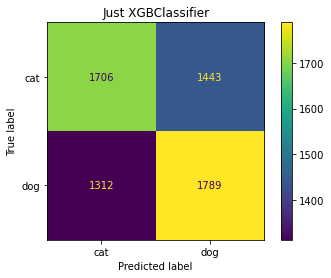

In [48]:
plot_confusion_matrix(clf_xgb.fit(X_train_reduced, y_train), X_test_reduced, y_test)
plt.title('Just XGBClassifier')
plt.show()

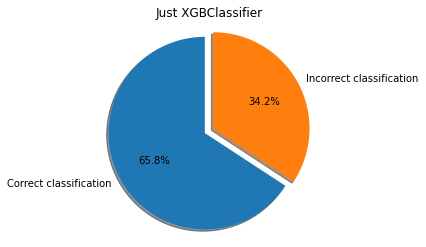

In [44]:
labels = ['Correct classification', 'Incorrect classification']
sizes = [scores.mean(), 1-scores.mean()]
explode = (0.1, 0)  # The cause of separation

fig1, ax1 = plt.subplots()
plt.title('Just XGBClassifier')
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

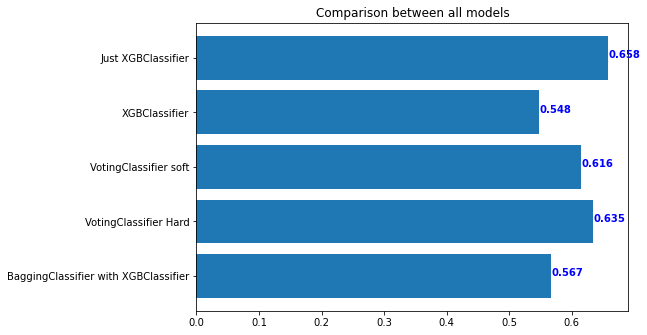

In [50]:
fig = plt.figure()

# [left, bottom, width, height]
axes = fig.add_axes([1,1,1,1])

D = {u'BaggingClassifier with XGBClassifier':grid_clf_xgb.score(X_test_reduced,y_test),
     u'VotingClassifier Hard': score_hard.mean(),
     u'VotingClassifier soft':scores_soft.mean(), u'XGBClassifier':grid_clf_XGBClassifier.score(X_test_reduced,y_test),
    u'Just XGBClassifier': scores.mean()}



plt.barh(range(len(D)), list(D.values()), align='center')
plt.yticks(range(len(D)), list(D.keys()),)
plt.title('Comparison between all models')

y = [grid_clf_xgb.score(X_test_reduced,y_test), score_hard.mean(), scores_soft.mean(),
     grid_clf_XGBClassifier.score(X_test_reduced,y_test), scores.mean()]
# print(y)
x = []
for i in y:
    x.append('{:.3f}'.format(i))
# print(x)
x = [float(i) for i in x]
# print(x)

for i, v in enumerate(x):
    plt.text(v, i, str(v), color='blue', fontweight='bold')



plt.show()